### ToDo list
1. change workbook file name to workbook - LC - path to datafile for the sample.
2. write sample information and data acquisition notes in the following cell
3. deskew all sample scan stacks (tiling part)

# Sample Description
#### collagen embedded mchy-RAW264.7 on coverslip, tile cells channel first.
- tiling channel: red
- tiling style: fast scan (6 um step length).
- tiling z = 20.1
- Bead position is around [9,9]


# Data description
#### [data folder]
1. \2021-09-08-mCherryRAW\first-fast-tiling
2. 2021-09-08-mCherryRAW\second-sample-scan-explore-round1





# Useful scripts
#### deskew all sample scan stacks
go to the data folder on LC

`getconda
conda activate llsmvis
scp /g/g92/yi10/llsmvis/tools/getdsk .
chmod u+rwx ./getdsk
./getdsk`


`mkdir mp4s
for i in $(ls)
do
if [[ $i == *deskewed ]]
then
scp ./$i/*.mp4 ./mp4s/$i.mp4
scp ./$i/*.png ./mp4s/$i.png
fi
done
`

`for i in $(ls); do if [[ $i == *.py ]]; then s=${i:0:-3}; mkdir $s; scp $i ./$s/calcpy; echo $s; fi; done`

------------------------------------------------------------------------------

`tmpris.countcalcpy prepslurm t 30 5 1:00:00 pbatch dynimag 10 2`


`
rm queue-log
touch queue-log
echo start tracking >> queue-log
for i in $(seq 100)
do
echo $(ck) >> queue-log
echo $(date) >> queue-log
sleep 60s
done
`


In [1]:
# define result folder path and Positions.csv file path
raw_data_folder = '/p/lscratchh/yi10/llsm-data/2021-10-18-mCherryRAW264.7-wgrids/large-tiling-red'
result_folder = raw_data_folder+'/results_dsk'
position_path = raw_data_folder+'/Positions.csv'
jpath=raw_data_folder+'jobs_dsk'

make_new_csv = True

In [2]:
# import stuff...
import os
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import sys

In [3]:
sys.path.append(jpath)

# Define a bunch of tools...

In [4]:
def read_a_tile_MIPxy(MIPs_all, tile_ind):
    arr = io.imread(MIPs_all[0][tile_ind])
    return arr

def get_paths_to_MIPs_sorted(result_folder):
    mipsall=[]
    for mipstr in ['MIP_channel0_XY.tif', 'MIP_channel0_XZ.tif', 'MIP_channel0_YZ.tif']:
        mips=[]
        tile_folders = [f for f in os.listdir(result_folder) if os.path.isfile(os.path.join(result_folder, f, mipstr)) and f.startswith('Tile')]
        for i in np.arange(0,len(tile_folders)):
            x=[g for g in tile_folders if g.startswith('Tile'+str(i)+'_')]
            mips.append(os.path.join(result_folder, x[0], mipstr))
        mipsall.append(mips)
    return mipsall

def plt_nxm_tiles_MIPxy(xyMIPs_paths,n=5,m=5,ttstr=True,vmin=0,vmax=4000):
    plt.figure(figsize=(20,20))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(xyMIPs_paths[0][ind])
            plt.subplot(n,m,ind+1)
            plt.imshow(np.flipud(arr.T),vmin=vmin,vmax=vmax)
            if ttstr:
                #plt.title(str(ind))
                plt.text(200,400,str(ind),color='yellow')
            plt.axis('off')

def plt_nxm_tiles_MIPs_XZ(MIPs,n=5,m=5):
    plt.figure(figsize=(15,5))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(MIPs[ind])
            plt.subplot(n, m, ind+1)
            plt.imshow(np.flipud(arr))
            plt.title('(XZ mip) Tile '+str(ind))
            plt.axis('off')


def plt_nxm_tiles_MIPs_YZ(MIPs, n=5, m=5):
    plt.figure(figsize=(15,5))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(MIPs[ind])
            plt.subplot(n,m,ind+1)
            plt.imshow(np.flipud(arr))
            plt.title('(YZ mip) Tile '+str(ind))
            plt.axis('off')

def plot_a_tile(tile_ind,MIPs_all,vmin=0,vmax=4000):
    plt.figure(figsize=(15,15))
    arr1 = io.imread(MIPs_all[0][tile_ind])
    arr2 = io.imread(MIPs_all[1][tile_ind])
    arr3 = io.imread(MIPs_all[2][tile_ind])
    plt.imshow(np.flipud(arr1.T),vmin=vmin,vmax=vmax)
    plt.title('(XY mip) Tile '+str(tile_ind))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow((arr2))
    plt.title('(XZ mip) Tile '+str(tile_ind))
    plt.axis('off')
    
    plt.subplot(2,1,2)
    plt.imshow(np.flipud(arr3))
    plt.title('(YZ mip) Tile '+str(tile_ind))
    plt.axis('off')

def plot_two_tiles(tile_inda, tile_indb, MIPs_all,vmin=0,vmax=4000):
    plt.figure(figsize=(15,15))
    a1 = io.imread(MIPs_all[0][tile_inda])
    a2 = io.imread(MIPs_all[1][tile_inda])
    a3 = io.imread(MIPs_all[2][tile_inda])
    b1 = io.imread(MIPs_all[0][tile_indb])
    b2 = io.imread(MIPs_all[1][tile_indb])
    b3 = io.imread(MIPs_all[2][tile_indb])
    plt.subplot(1,2,1)
    plt.imshow(np.flipud(a1.T),vmin=vmin,vmax=vmax)
    plt.title('(XY mip) Tile '+str(tile_inda))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(np.flipud(b1.T),vmin=vmin,vmax=vmax)
    plt.title('(XY mip) Tile '+str(tile_indb))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow((a2))
    plt.title('(XZ mip) Tile '+str(tile_inda))
    plt.axis('off')
    plt.subplot(2,1,2)
    plt.imshow((b2))
    plt.title('(XZ mip) Tile '+str(tile_indb))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow(np.flipud(a3))
    plt.title('(YZ mip) Tile '+str(tile_inda))
    plt.axis('off')    
    plt.subplot(2,1,2)
    plt.imshow(np.flipud(b3))
    plt.title('(YZ mip) Tile '+str(tile_indb))
    plt.axis('off')

def export_cell_positions(ps,tinds):
    with open(result_folder + '/Positions_chosen_tiles_only.csv', mode='w') as f:
        writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        writer.writerow(['Name', 'X (mm)', 'Y (mm)', 'Z (mm)'])
        writer.writerow(['Center', '8', '8', '20.1'])
        writer.writerow(['','','',''])   
        for ind, p in enumerate(ps_chosen):
            writer.writerow(['Position --- cell '+str(ind) +' ----- T'+str(tinds[ind]),p[0],p[1],p[2]])
        writer.writerow(['','','',''])   

def export_zigzag_positions(ps):
    with open(result_folder + '/Positions_zigzag_path_only.csv', mode='w') as f:
        writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        writer.writerow(['Name', 'X (mm)', 'Y (mm)', 'Z (mm)'])
        writer.writerow(['','','',''])   
        for p in ps:
            writer.writerow(['Position ---------- '+p[3]+'-'+str(p[4]) ,p[0],p[1],p[2]])
        writer.writerow(['','','',''])  

In [5]:
MIPs_paths=get_paths_to_MIPs_sorted(result_folder)

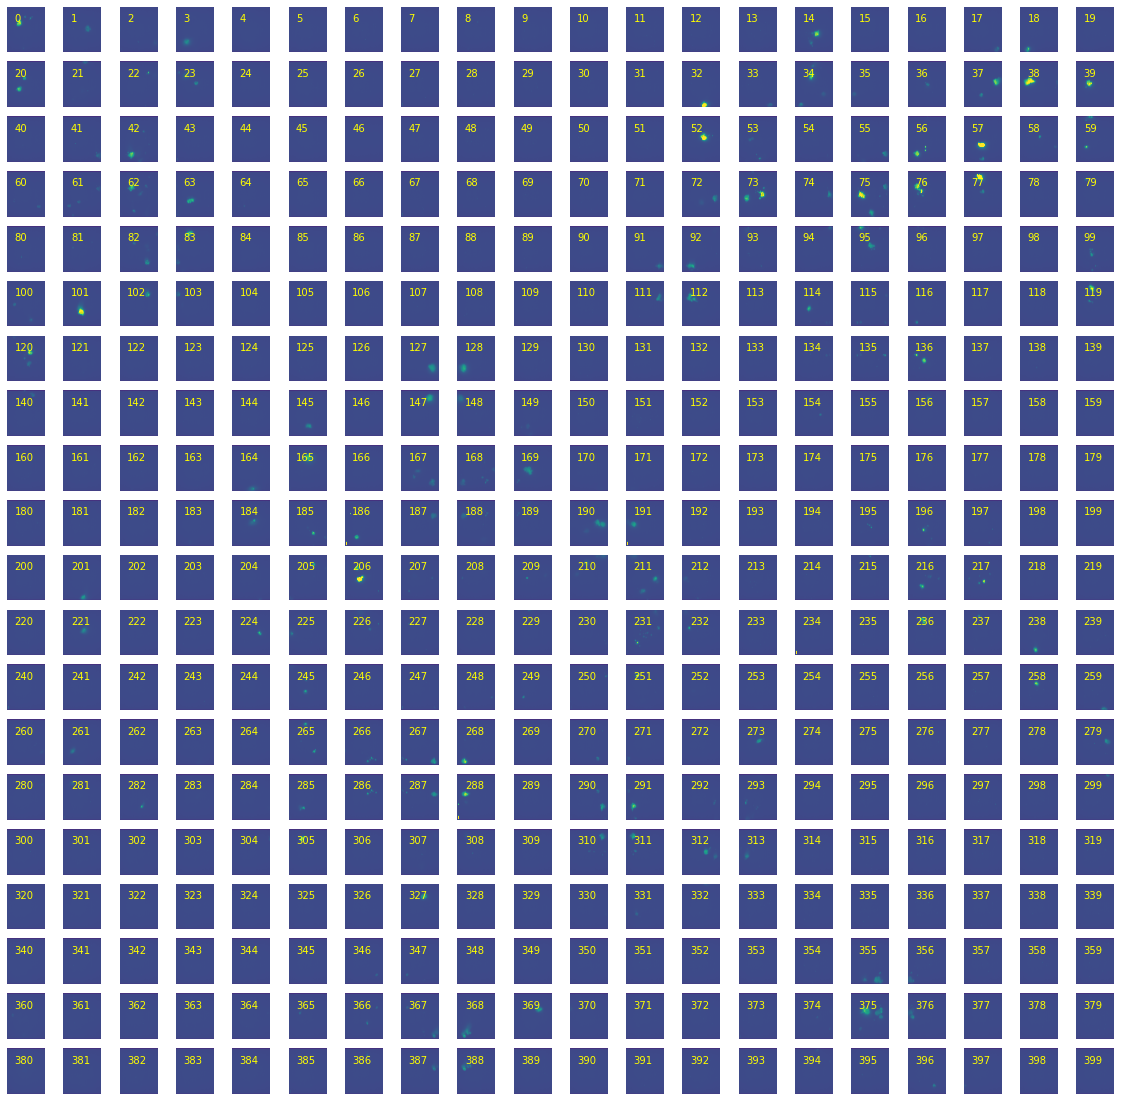

In [6]:
plt_nxm_tiles_MIPxy(MIPs_paths,n=20,m=20,ttstr=True,vmin=0,vmax=500)

# Note down chosen tile indexes

In [12]:
# note down the indexes of the tiles that has cells in it.
# tinds=[75,78,83,85,86, 88, 94, 97, 98, 100, 103, 104, 105, 106, 114, 115, 119] # tile index.
tinds=[0,0,0,0,0,0,1,14,32,37,26,22,44,59,118,136,156,152,161,174,177,199,193,192,110,238,155,150,263,312,309,325,333,355,393]

print('total tile number is ' + str(len(tinds)))

total tile number is 35


### Make a chosen zigzag position file

In [30]:
ps=[]
for ind,y in enumerate(np.arange(7,9,0.07)):
    ys=np.round(y*10000)/10000
    ps.append([7, ys, 20.1, 'L', ind])
    ps.append([9, ys, 20.1, 'R', ind])
    
export_zigzag_positions(ps)

In [28]:
p=ps[0]
'Position ---------- '+p[3]+'-'+str(p[4]) 

'Position ---------- L-0'

# Make a new .csv with the selected file positions

In [8]:
if make_new_csv is True:
    # load in the original Position.csv file to get the bead location, and the Tiles location.
    ps=pd.read_csv(position_path)

    # make a list of positions of the chosen tiles ind
    ps_chosen=[]
    for i in tinds:
        x=np.float(ps.loc[ps['Name']=='Position --- Tile '+str(i)]['X (mm)'])
        y=np.float(ps.loc[ps['Name']=='Position --- Tile '+str(i)]['Y (mm)'])
        z=np.float(ps.loc[ps['Name']=='Position --- Tile '+str(i)]['Z (mm)'])
        ps_chosen.append([x,y,z])

    # export the tile indexes as a .csv file
    export_cell_positions(ps,tinds)

    # load the tile indexes .csv file into a dataframe
    ps2=pd.read_csv(result_folder + '/Positions_chosen_tiles_only.csv')

    # push th eindex of the original positions by the length of the chosen tiles indexes
    ps=ps.set_index([np.arange(len(ps))+ps2.shape[0]])

    # concatenate the two dataframes to make a new .csv file with all tile positions, and the chosen tile positions
    a=pd.concat([ps2,ps])

    # export the patched positions into a new .csv file to load back into the LLSM controller software
    a.to_csv(result_folder + '/Positions_ori_with_chosen_tiles.csv',index=False)

In [9]:
print(result_folder)

/p/lscratchh/yi10/llsm-data/2021-09-29-mCherryRAW264.7-condition1/large-tiling/results_dsk


In [37]:
# take a look at how it looks like.
a[1:10]

,Name,X (mm),Y (mm),Z (mm)
1,NaN,NaN,NaN,NaN
2,Position --- cell 0 ----- T126,7.92,8.32,20.1
3,Position --- cell 1 ----- T135,7.92,8.95,20.1
4,Position --- cell 2 ----- T136,7.92,9.02,20.1
5,Position --- cell 3 ----- T148,7.99,8.46,20.1
6,Position --- cell 4 ----- T149,7.99,8.53,20.1
7,Position --- cell 5 ----- T151,7.99,8.67,20.1
8,Position --- cell 6 ----- T153,7.99,8.81,20.1
9,Position --- cell 7 ----- T155,7.99,8.95,20.1


## Now to go lc and download the updated .csv file to Fiddlesticks

#### useful scripts on local mac terminal
`cd /Users/yi10/temp
open .
cd /Users/yi10/OneDrive\ -\ LLNL/temp
open .
`

# Generate a view for stitched tiles

In [7]:
def stitch_UD(U,D,du,dd,overlap=True,showim=False, choosemax=True,vmin=0,vmax=4000):
    dimU=U.shape
    dimD=D.shape
    if overlap is True:
        M=np.zeros([dimU[0]+dimD[0]-du-dd, dimU[1]])
        M[0:dimU[0],:]=M[0:dimU[0],:]+U
        M[-dimD[0]:,:]=M[-dimD[0]:,:]+D
    elif choosemax is True:
        M=np.zeros([dimU[0]+dimD[0]-du-dd, dimU[1]])
        M[0:dimU[0],:]=M[0:dimU[0],:]+U
        M[-dimD[0]:,:]=np.maximum(M[-dimD[0]:,:],D)
        print('choose max')
    else:
        M=np.concatenate([U[0:-du,:],D[dd:,:]])
        
    if showim is True:
        plt.figure(figsize=(25,25))
        plt.imshow(M.T,vmin=vmin,vmax=vmax)
        
    return M

def stitch_20x20_XY(ts,du1,dd1, du2,dd2, overlap=True, showim=True, choosemax=True,vmax=2000):
    Ts=[]
    for row_ind in np.arange(20): # stitch every row and store in Ts
        U=ts[0+row_ind*20][3:-2]
        D=ts[1+row_ind*20][3:-2]
        D2=ts[2+row_ind*20][3:-2]
        D3=ts[3+row_ind*20][3:-2]
        D4=ts[4+row_ind*20][3:-2]
        D5=ts[5+row_ind*20][3:-2]
        D6=ts[6+row_ind*20][3:-2]
        D7=ts[7+row_ind*20][3:-2]
        D8=ts[8+row_ind*20][3:-2]
        D9=ts[9+row_ind*20][3:-2]
        D10=ts[10+row_ind*20][3:-2]
        D11=ts[11+row_ind*20][3:-2]
        D12=ts[12+row_ind*20][3:-2]
        D13=ts[13+row_ind*20][3:-2]
        D14=ts[14+row_ind*20][3:-2]
        D15=ts[15+row_ind*20][3:-2]
        D16=ts[16+row_ind*20][3:-2]
        D17=ts[17+row_ind*20][3:-2]
        D18=ts[18+row_ind*20][3:-2]
        D19=ts[19+row_ind*20][3:-2]
        U2=stitch_UD(U,D,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U3=stitch_UD(U2,D2,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U4=stitch_UD(U3,D3,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U5=stitch_UD(U4,D4,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U6=stitch_UD(U5,D5,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U7=stitch_UD(U6,D6,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U8=stitch_UD(U7,D7,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U9=stitch_UD(U8,D8,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U10=stitch_UD(U9,D9,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U11=stitch_UD(U10,D10,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U12=stitch_UD(U11,D11,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U13=stitch_UD(U12,D12,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U14=stitch_UD(U13,D13,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U15=stitch_UD(U14,D14,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U16=stitch_UD(U15,D15,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U17=stitch_UD(U16,D16,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U18=stitch_UD(U17,D17,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U19=stitch_UD(U18,D18,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        T=stitch_UD(U19,D19,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        Ts.append(T)
    
    U=np.flipud(Ts[0].T)
    D=np.flipud(Ts[1].T)
    D2=np.flipud(Ts[2].T)
    D3=np.flipud(Ts[3].T)
    D4=np.flipud(Ts[4].T)
    D5=np.flipud(Ts[5].T)
    D6=np.flipud(Ts[6].T)
    D7=np.flipud(Ts[7].T)
    D8=np.flipud(Ts[8].T)
    D9=np.flipud(Ts[9].T)
    D10=np.flipud(Ts[10].T)
    D11=np.flipud(Ts[11].T)
    D12=np.flipud(Ts[12].T)
    D13=np.flipud(Ts[13].T)
    D14=np.flipud(Ts[14].T)
    D15=np.flipud(Ts[15].T)
    D16=np.flipud(Ts[16].T)
    D17=np.flipud(Ts[17].T)
    D18=np.flipud(Ts[18].T)
    D19=np.flipud(Ts[19].T)
    U2=stitch_UD(U,D,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U3=stitch_UD(U2,D2,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U4=stitch_UD(U3,D3,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U5=stitch_UD(U4,D4,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U6=stitch_UD(U5,D5,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U7=stitch_UD(U6,D6,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U8=stitch_UD(U7,D7,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U9=stitch_UD(U8,D8,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U10=stitch_UD(U9,D9,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U11=stitch_UD(U10,D10,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U12=stitch_UD(U11,D11,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U13=stitch_UD(U12,D12,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U14=stitch_UD(U13,D13,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U15=stitch_UD(U14,D14,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U16=stitch_UD(U15,D15,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U17=stitch_UD(U16,D16,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U18=stitch_UD(U17,D17,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U19=stitch_UD(U18,D18,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    T20x20=stitch_UD(U19,D19,du=du2,dd=dd2, overlap=overlap, showim=showim, choosemax=choosemax,vmax=vmax)
    return T20x20

In [8]:
ts=[read_a_tile_MIPxy(MIPs_paths, x) for x in np.arange(400)]


choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max
choose max

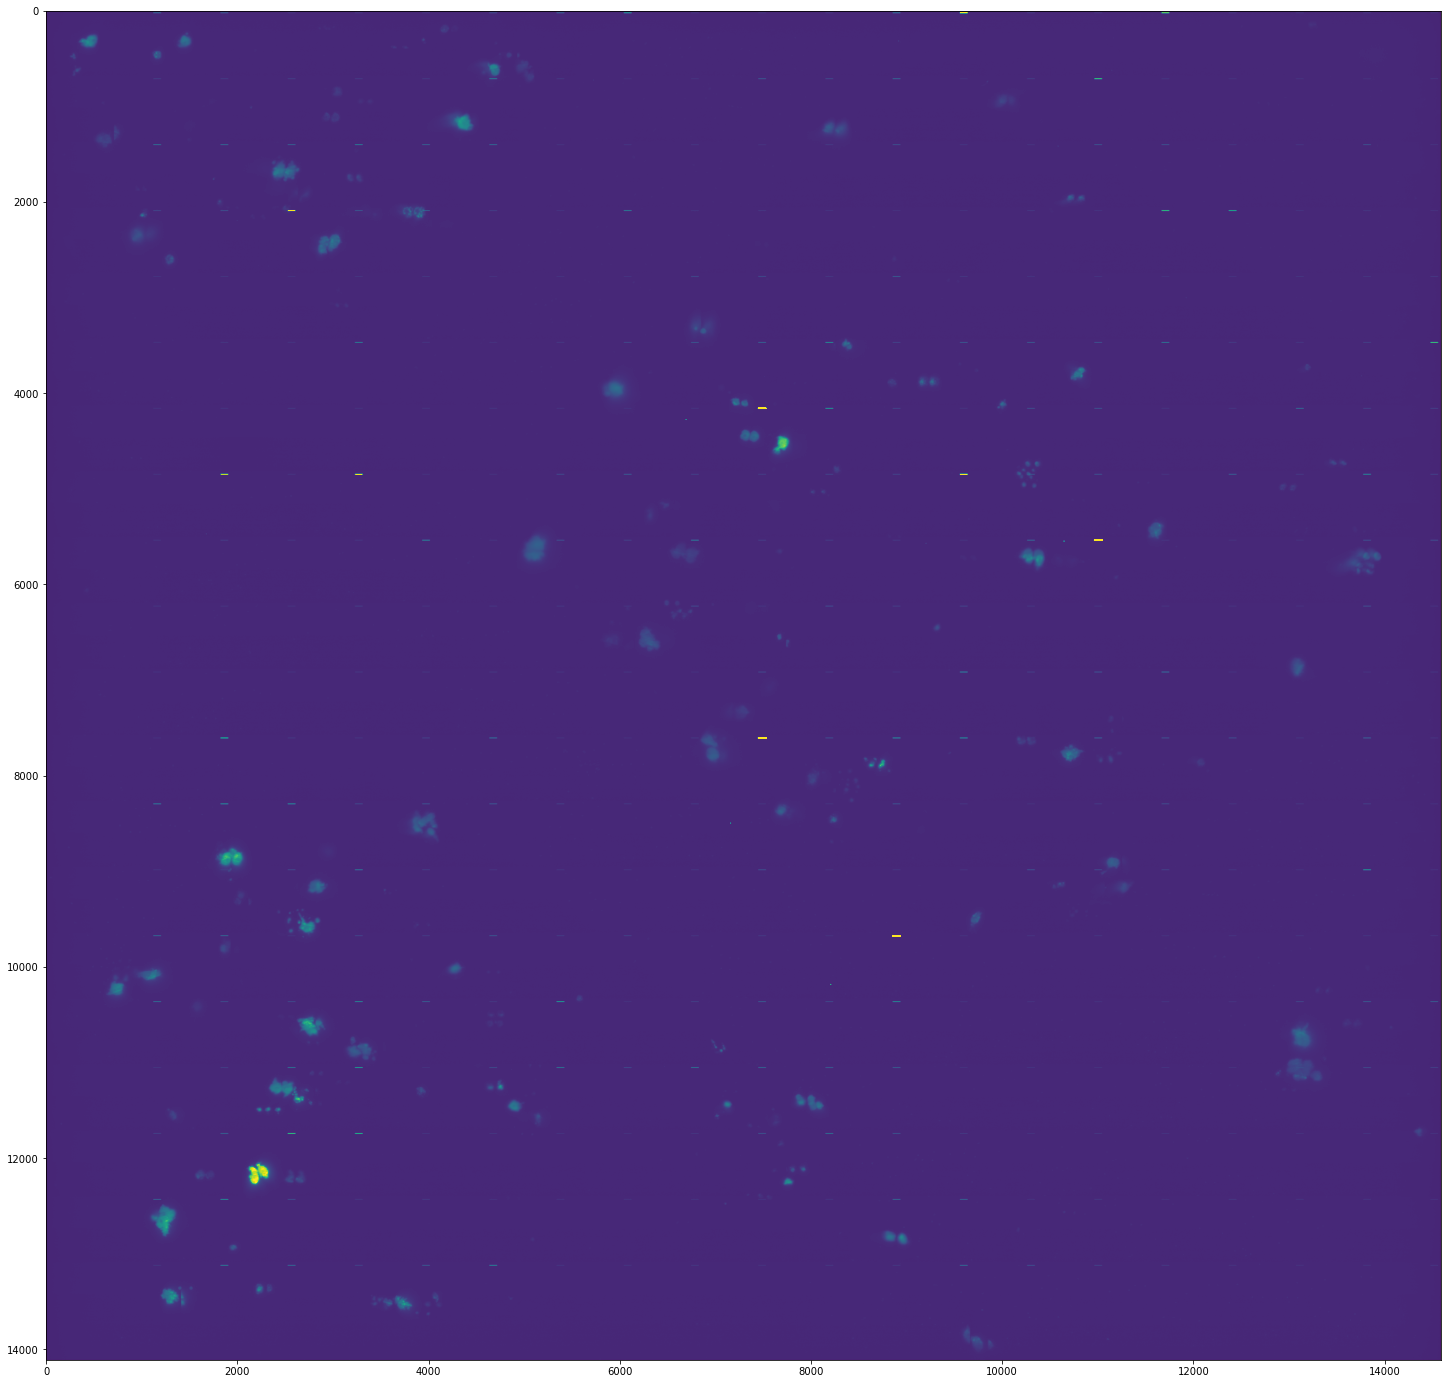

In [9]:
T=stitch_20x20_XY(ts,du1=80,dd1=250, du2=280, dd2=250, overlap=False, showim=True, choosemax=True,vmax=1000)

# When imaging individual cells, view the tile here

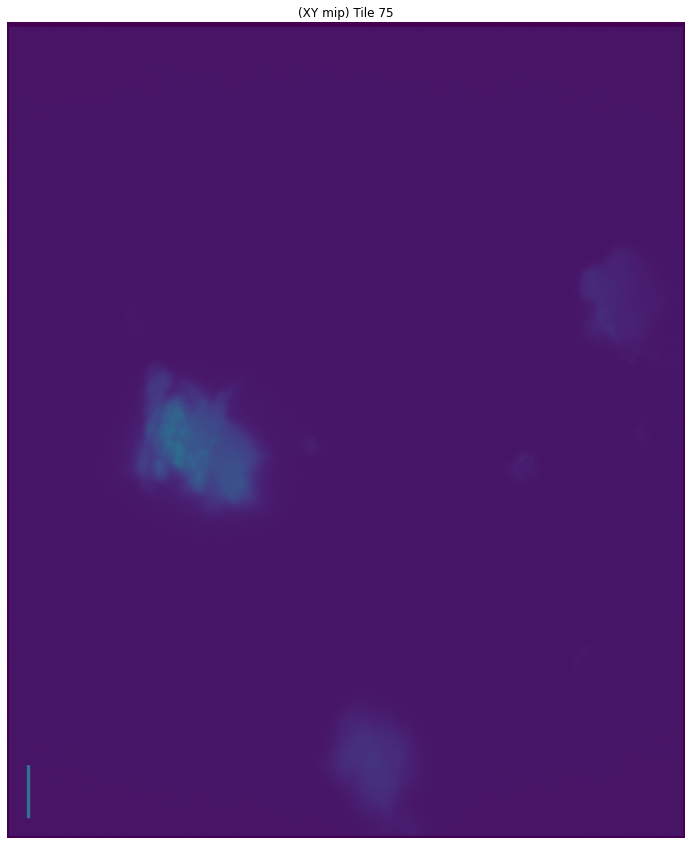

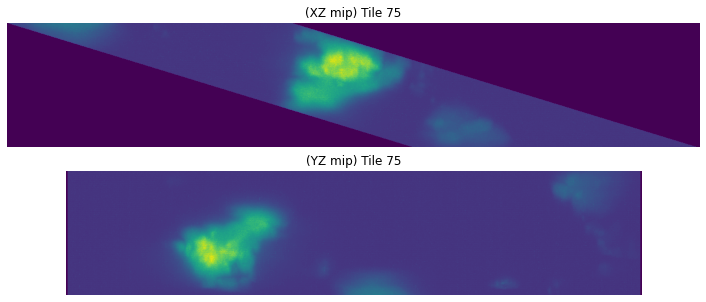

In [10]:
plot_a_tile(75,MIPs_paths,vmin=0,vmax=2000)

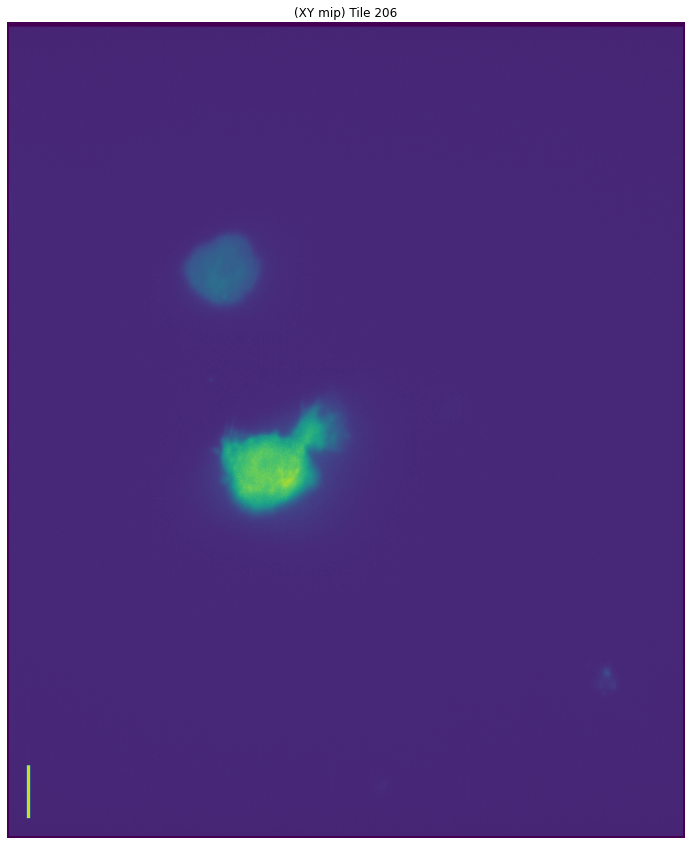

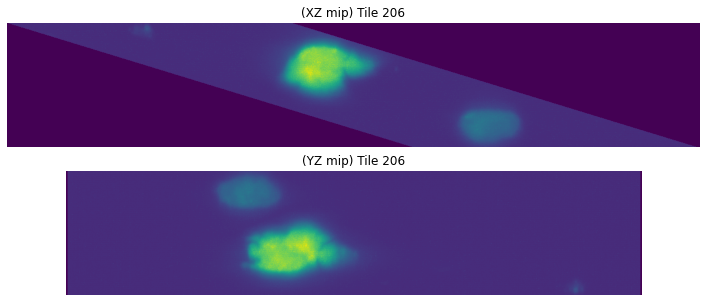

In [28]:
plot_a_tile(206,MIPs_paths,vmin=0,vmax=1000)

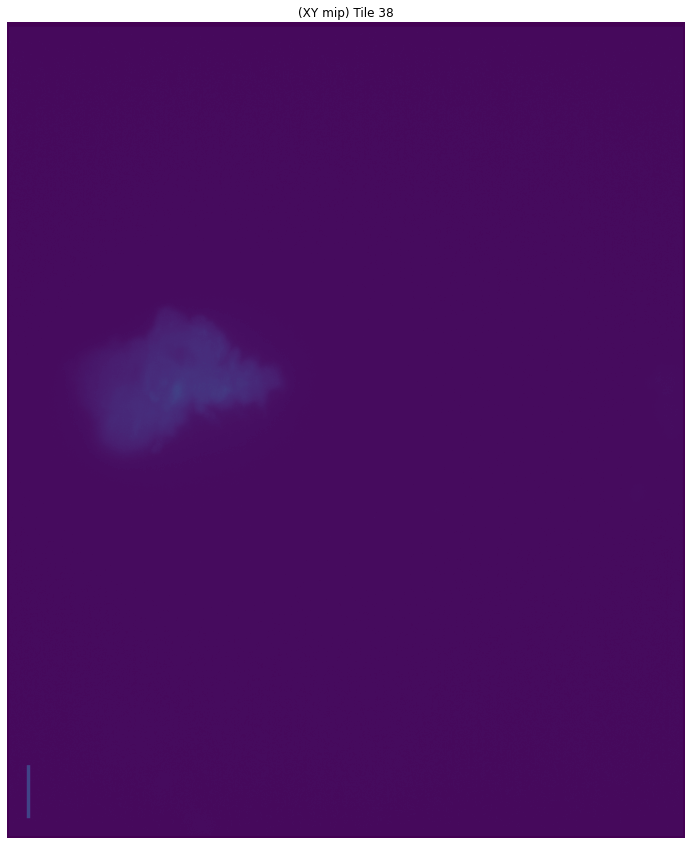

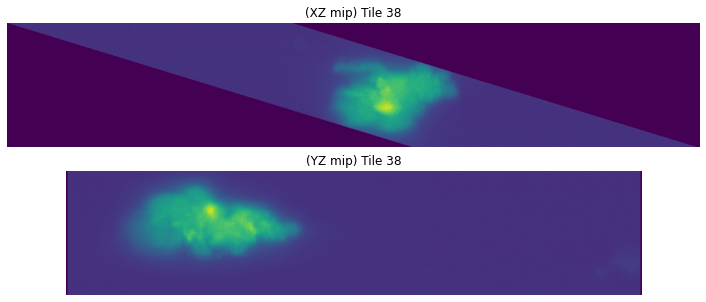

In [17]:
plot_a_tile(38,MIPs_paths,vmin=0,vmax=4000)

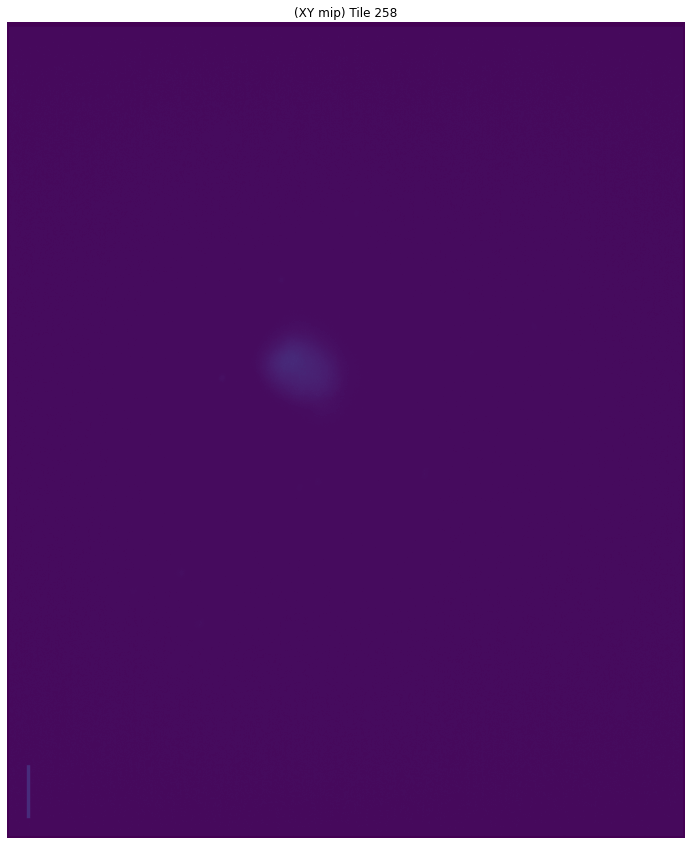

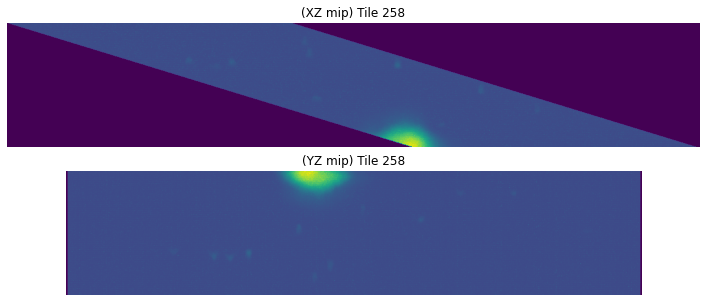

In [18]:
plot_a_tile(258,MIPs_paths,vmin=0,vmax=4000)

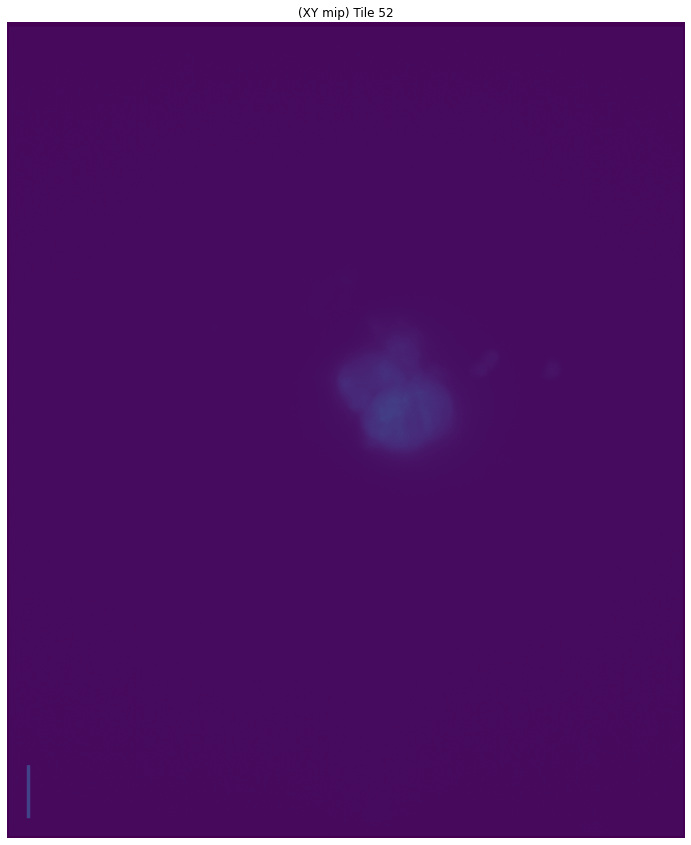

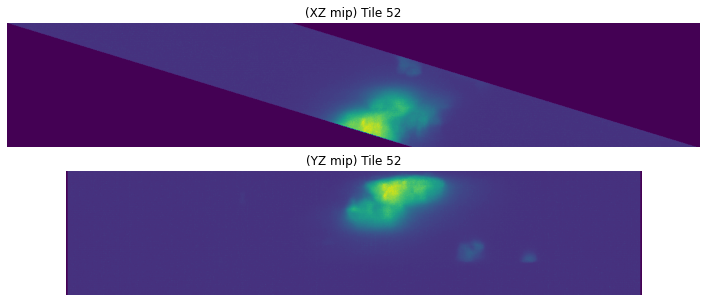

In [20]:
plot_a_tile(52,MIPs_paths,vmin=0,vmax=4000)

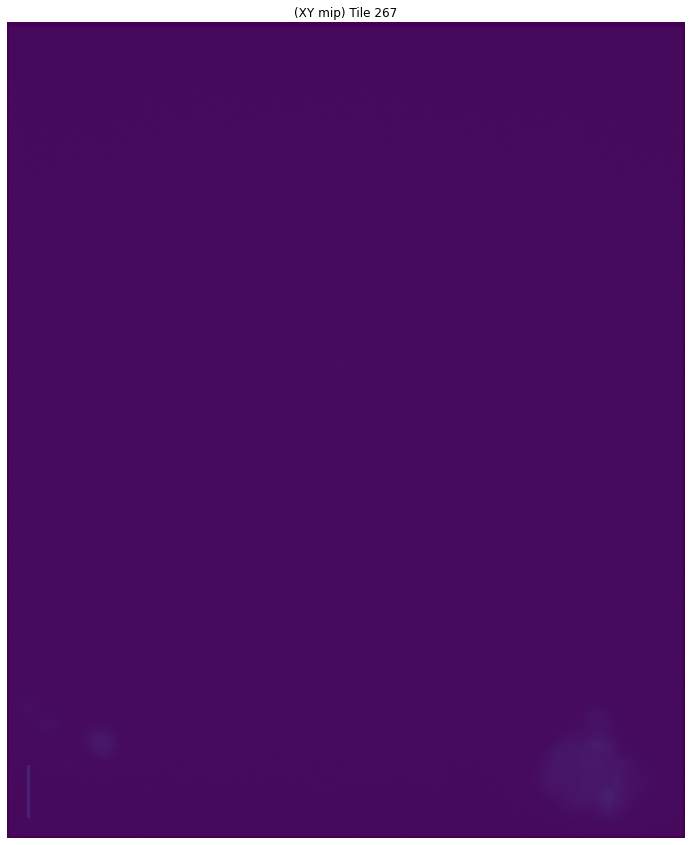

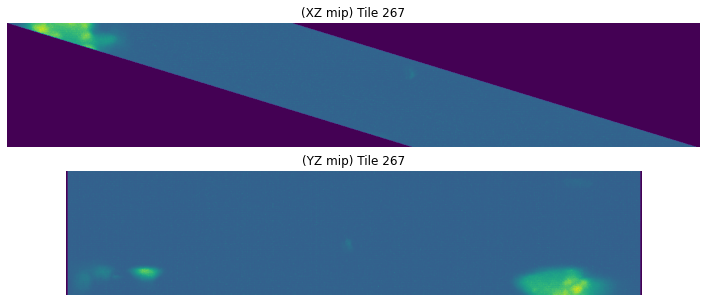

In [23]:
plot_a_tile(267,MIPs_paths,vmin=0,vmax=4000)

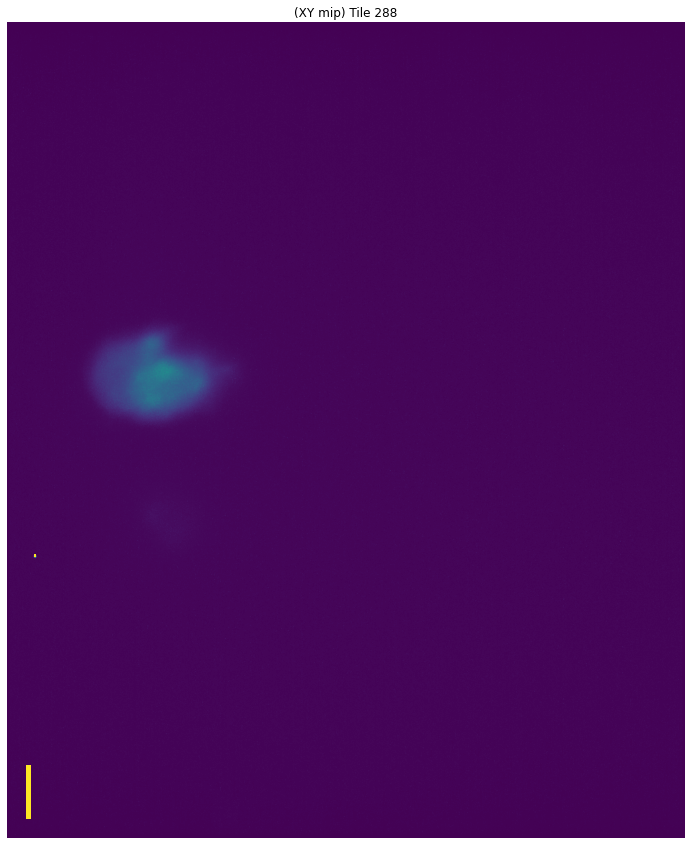

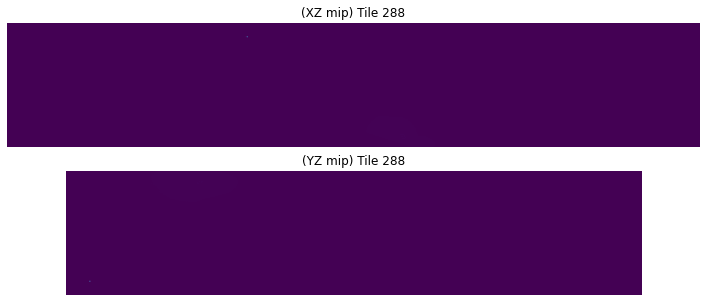

In [26]:
plot_a_tile(288,MIPs_paths,vmin=100,vmax=1000)